<a href="https://colab.research.google.com/github/alonsosilvaallende/Desigualdad-Covid19/blob/master/Positividad_conurbacion_de_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Web scrapping
import requests
from bs4 import BeautifulSoup
import lxml.html as lh

Datos: https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto55

In [ ]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto55/Positividad_por_comuna.csv")

In [ ]:
data_raw.head()

,Region,Codigo region,Comuna,Codigo comuna,fecha,positividad
0,Antofagasta,2,Antofagasta,2101,2020-03-02,NaN
1,Antofagasta,2,Antofagasta,2101,2020-03-03,NaN
2,Antofagasta,2,Antofagasta,2101,2020-03-04,NaN
3,Antofagasta,2,Antofagasta,2101,2020-03-05,NaN
4,Antofagasta,2,Antofagasta,2101,2020-03-06,NaN


In [ ]:
data_raw["Region"].unique()

array(['Antofagasta', 'Valparaíso', 'Metropolitana', 'Araucanía', 'Maule',
       'Los Lagos', 'Biobío', 'Ñuble', 'Atacama', 'Magallanes',
       'O’Higgins', 'Arica y Parinacota', 'Coquimbo', 'Los Ríos', 'Aysén',
       'Tarapacá'], dtype=object)

In [ ]:
data_RM = data_raw.query("Region == 'Metropolitana'")

In [ ]:
data_RM = data_RM.drop(columns=["Region", "Codigo region"])

In [ ]:
data_RM["fecha"] = pd.to_datetime(data_RM["fecha"])

In [ ]:
first_date, last_date = data_RM["fecha"].sort_values().iloc[0], data_RM["fecha"].sort_values().iloc[-1]
first_date, last_date

(Timestamp('2020-03-02 00:00:00'), Timestamp('2020-09-08 00:00:00'))

In [ ]:
dates = pd.date_range(start=first_date, end=last_date)

Datos: https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago

In [ ]:
url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile#Conurbaci%C3%B3n_de_Santiago"

In [ ]:
res = requests.get(url).text
soup = BeautifulSoup(res,'lxml')
soup.prettify()
table = soup.find('table',{'class':'wikitable sortable'}).find_all('tr')[1:]

In [ ]:
#We create a DataFrame of the Santiago neighborhood's according to wikipedia:
df_stgo = pd.DataFrame(columns = ['Comuna','Sector'], index = None)
for items in table:
    data = items.find_all(['th','td'])
    name = data[0].text
    borough = data[1].text
    df_stgo = df_stgo.append({'Comuna':name,
                              'Sector':borough}, ignore_index = True)

In [ ]:
df_stgo

,Comuna,Sector
0,Cerrillos,surponiente
1,Cerro Navia,norponiente
2,Conchalí,norte
3,El Bosque,sur
4,Estación Central,surponiente
5,Huechuraba,norte
6,Independencia,norte
7,La Cisterna,sur
8,La Florida,suroriente
9,La Granja,sur


In [ ]:
data = pd.DataFrame()
data["fecha"] = dates
data = data.set_index("fecha")

In [ ]:
for comuna in data_RM["Comuna"].unique():
    data[comuna] = data_RM.query(f"Comuna == '{comuna}'").drop(columns=["Comuna", "Codigo comuna"]).set_index("fecha")["positividad"]

In [ ]:
data.tail()

,Cerrillos,Estación Central,La Florida,Las Condes,Maipú,Pedro Aguirre Cerda,Peñalolén,Pudahuel,San Bernardo,San Joaquín,Santiago,El Bosque,Puente Alto,Vitacura,Huechuraba,Ñuñoa,Quinta Normal,Recoleta,Lo Barnechea,Paine,Colina,La Reina,Quilicura,La Cisterna,Padre Hurtado,Providencia,San Miguel,Independencia,Lo Prado,Macul,Melipilla,San Ramón,Talagante,Conchalí,Peñaflor,San José de Maipo,Buin,La Granja,Lo Espejo,Cerro Navia,El Monte,Lampa,Renca,Calera de Tango,San Pedro,Tiltil,Curacaví,Pirque,La Pintana,Isla de Maipo,María Pinto,Alhué
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-04,0.050209,0.038384,0.059239,0.037679,0.057294,0.067515,0.041139,0.049963,0.047613,0.065718,0.057237,0.068351,0.091957,0.021049,0.054909,0.047247,0.043706,0.068631,0.038613,0.125567,0.090914,0.043541,0.075340,0.071802,0.071082,0.027168,0.050501,0.047640,0.057824,0.047754,0.067706,0.078471,0.037839,0.065010,0.043793,0.054694,0.086819,0.056192,0.064578,0.047152,0.015530,0.077665,0.062149,0.028779,0.033911,0.06453,0.023503,0.044955,0.063636,0.017316,0.011310,0.216199
2020-09-05,0.040932,0.039948,0.070347,0.040271,0.062394,0.071460,0.040910,0.056144,0.048432,0.051630,0.055083,0.065797,0.086762,0.023597,0.060443,0.047573,0.045064,0.067314,0.038042,0.127088,0.081861,0.035084,0.067500,0.076870,0.066813,0.027292,0.050548,0.054648,0.069040,0.045740,0.079888,0.079178,0.050444,0.072584,0.034626,0.073061,0.081189,0.063029,0.058035,0.042340,0.020065,0.082427,0.070890,0.054753,0.033911,NaN,0.029621,0.052474,0.063011,0.017316,0.058929,0.172243
2020-09-06,0.038768,0.036777,0.064584,0.033184,0.065884,0.070505,0.042108,0.059879,0.050519,0.072942,0.057229,0.065937,0.085019,0.038217,0.070128,0.039057,0.043076,0.066357,0.039449,0.118787,0.093341,0.033917,0.057330,0.070823,0.068112,0.038385,0.051043,0.053404,0.079715,0.032566,0.085317,0.061690,0.054412,0.089697,0.043470,NaN,0.070564,0.068911,0.060801,0.048899,0.020065,0.093633,0.077802,0.090467,0.081530,NaN,0.031163,NaN,0.052615,0.015359,NaN,0.191570
2020-09-07,0.033516,0.033555,0.060061,0.034745,0.065819,0.066037,0.042013,0.058300,0.048567,0.064345,0.056541,0.059255,0.079193,0.039283,0.056495,0.037846,0.039424,0.060915,0.029266,0.124042,0.087867,0.029799,0.053793,0.072885,0.068872,0.033619,0.048441,0.052621,0.073271,0.030587,0.082842,0.054395,0.051570,0.089324,0.041775,NaN,0.066325,0.057398,0.055037,0.053877,0.011868,0.092937,0.078951,0.084256,NaN,NaN,0.027539,NaN,0.041643,0.019513,NaN,0.224038
2020-09-08,0.027903,0.032102,0.059115,0.033337,0.064281,0.061925,0.039893,0.057195,0.050640,0.056640,0.057148,0.058679,0.073372,0.044980,0.057781,0.038127,0.039969,0.059049,0.027935,0.122518,0.081333,0.038314,0.043492,0.078213,0.069731,0.028019,0.045306,0.048825,0.067697,0.029434,0.083224,0.056456,0.048164,0.087982,0.045584,NaN,0.066197,0.055333,0.049265,0.054161,0.012931,0.083878,0.076359,0.086958,NaN,NaN,0.038578,NaN,0.033953,NaN,NaN,NaN


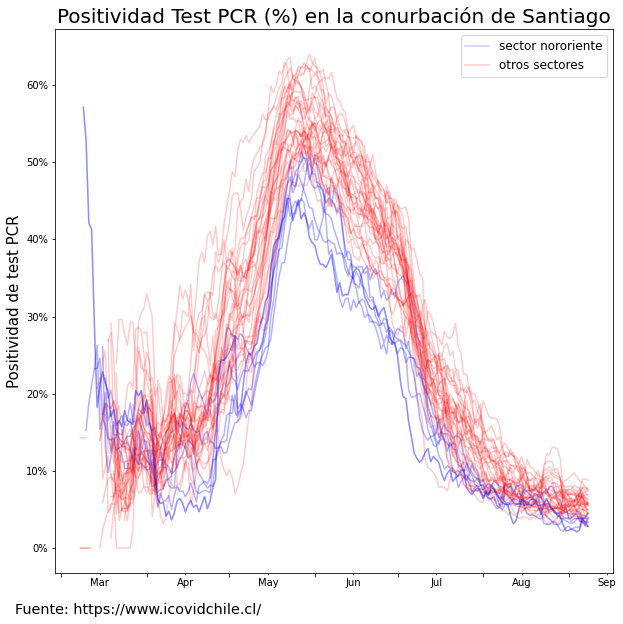

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for comuna in df_stgo["Comuna"]:
    if comuna in list(df_stgo[df_stgo["Sector"] == 'nororiente']["Comuna"]):
        ax.plot(data[comuna].index, 100*data[comuna],color="blue", alpha=0.3)
    else:
        ax.plot(data[comuna].index, 100*data[comuna],color="red", alpha=0.2)
    
ax.plot(data["Vitacura"].index, 100*data["Vitacura"],color="blue", alpha=0.2, label="sector nororiente")
ax.plot(data["Santiago"].index, 100*data["Santiago"],color="red", alpha=0.2, label="otros sectores")
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%h'));
ax.legend(fontsize="large")
ax.set_yticks([10*i for i in range(7)])
ax.set_yticklabels([f"{10*i}%" for i in range(7)])
ax.set_title("Positividad Test PCR (%) en la conurbación de Santiago", fontsize=20)
ax.set_ylabel("Positividad de test PCR", fontsize=15)
plt.annotate('Fuente: https://www.icovidchile.cl/', (0,0), (-40,-30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize="x-large")
plt.savefig('2020-09-08-Positividad.png', bbox_inches='tight', format='png', dvi=8000)
# plt.show()

In [ ]:
from google.colab import files
files.download("2020-09-08-Positividad.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>